# Classroom Example: Multi-Armed Bandit


You have four bandits to choose from -- initially you know nothing about these. It is your task to maximize the mean reward (find a policy for this). 

How do you proceed?

## JupyterHub Version

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact_manual
import random
import struct

# Define the bandits with their probabilities and rewards
# Probabilities are simply "masked" as a char - struct.pack('f',0.0)
bandits = {
    1: {'probability': round(struct.unpack('f', b'\x00\x00\x00?')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\x00@')[0])},
    2: {'probability': round(struct.unpack('f', b'fff?')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\x80?')[0])},
    3: {'probability': round(struct.unpack('f', b'\xcd\xcc\xcc=')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\x00A')[0])},
    4: {'probability': round(struct.unpack('f', b'\xaeGa>')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\xa0@')[0])}
}

# Function to simulate pulling a bandit
def pull_bandit(bandit_number):
    bandit = bandits[bandit_number]
    if random.random() < bandit['probability']:
        return bandit['reward']
    else:
        return 0

# Initial data for the four bandits (empty lists to start with)
bandit_rewards_experienced = [[], [], [], []]

# Create a dropdown menu for selecting a number between 1, 2, 3, 4, and a random option
dropdown = widgets.Dropdown(
    options=[1, 2, 3, 4, 'random'],
    value=1,
    description='Select bandit:',
)

# Create a text input field for specifying how many times to trigger the action
text_input = widgets.BoundedIntText(
    value=1,
    min=1,
    max=10000,
    step=1,
    description='Number of selections:',
)

# Create a checkbox for toggling error bars
error_bar_checkbox = widgets.Checkbox(
    value=True,
    description='Show error bars',
)

# Counter for total number of pulls and total reward
total_pulls = 0
total_reward = 0

# Define the function that updates the plot showing the expected reward for each bandit
def update_plot(bandit_rewards_experienced, show_error_bars):
    plt.figure(figsize=(6, 6))  # Adjusted figure size for space at the bottom
    
    x_positions = np.arange(1, 5)  # Position for each bandit
    
    # Calculate expected value (mean of experienced rewards) for each bandit
    expected_rewards = [np.mean(rewards) if len(rewards) > 0 else 0 for rewards in bandit_rewards_experienced]
    
    # Calculate standard deviation (uncertainty) for each bandit if error bars are enabled
    if show_error_bars:
        errors = [np.std(rewards) if len(rewards) > 1 else 0 for rewards in bandit_rewards_experienced]
    else:
        errors = [0] * 4  # No error bars if the checkbox is unchecked

    # Plot the expected rewards as points with or without error bars
    plt.errorbar(x_positions, expected_rewards, yerr=errors, fmt='o', capsize=5, label='Expected Reward' if show_error_bars else 'Expected Reward (No Error Bars)')
    
    # Set plot limits and labels
    plt.ylim(0, max([bandit['reward'] for bandit in bandits.values()]) + 1)  # Adjusted y-range to fit max reward
    plt.xlim(0.5, 4.5)
    plt.ylim(0., 4.5)
    plt.title('Multi-Armed Bandit: Expected Rewards')
    plt.xticks(x_positions, [f'Bandit {i}' for i in range(1, 5)])  # Label bandits
    plt.ylabel('Expected Reward')
    plt.grid(True)
    plt.legend()

    # Print expected rewards for each bandit
    for i in range(4):
        print(f"Expected reward for Bandit {i+1}: {expected_rewards[i]:.2f} (pulled {len(bandit_rewards_experienced[i])} times)")

    # Overall statistics
    global total_pulls, total_reward
    mean_reward = total_reward / total_pulls if total_pulls > 0 else 0

    # Print overall statistics
    print(f"\nTotal pulls: {total_pulls}")
    print(f"Cumulative reward: {total_reward:.2f}")
    print(f"Mean reward: {mean_reward:.2f}")

    plt.show()

# Define the function to simulate pulling bandits
def run_simulation_bandits(num, repetitions, show_error_bars):
    global bandit_rewards_experienced, total_pulls, total_reward
    for _ in range(repetitions):  # Repeat the action based on the number of selections
        if num == 'random':
            selected_bandit = random.randint(1, 4)  # Select a new random bandit for each repetition
        else:
            selected_bandit = num

        # Simulate pulling the selected bandit
        reward = pull_bandit(selected_bandit)
        
        # Update the bandit's rewards and global counters
        bandit_rewards_experienced[selected_bandit-1].append(reward)
        total_pulls += 1
        total_reward += reward

    # Update the plot after the simulation
    update_plot(bandit_rewards_experienced, show_error_bars)

# Create an interact manual button with the dropdown input, text input for repetitions, and checkbox for error bars
interact_button = interact_manual(run_simulation_bandits, num=dropdown, repetitions=text_input, show_error_bars=error_bar_checkbox)


## Version working on your own machine

In [2]:
# This part allows you to define your own policy.
# Initially, it simply chooses the first bandit.
def follow_your_policy(bandit_rewards_experienced):
    return 1

# You can also show error bars in the plot
show_error_bars = True

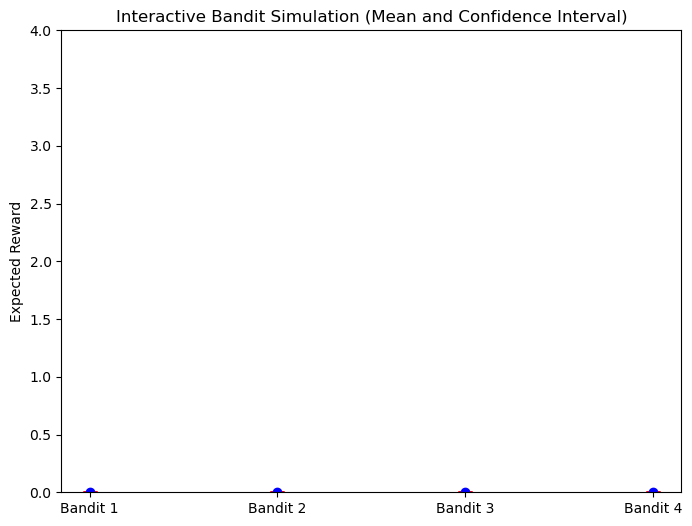

Bandit 1 - current estimated value [0.00] (0 data points)
Bandit 2 - current estimated value [0.00] (0 data points)
Bandit 3 - current estimated value [0.00] (0 data points)
Bandit 4 - current estimated value [0.00] (0 data points)


Label(value='')

Label(value='Total pulls: 0, Total reward: 0, Mean reward: 0.00')

In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import random
import struct
import numpy as np
from IPython.display import display, clear_output
from scipy import stats

# Define the bandits with their probabilities and rewards
# Probabilities are simply "masked" as a char - struct.pack('f',0.0)
bandits = {
    1: {'probability': round(struct.unpack('f', b'\x00\x00\x00?')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\x00@')[0])},
    2: {'probability': round(struct.unpack('f', b'fff?')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\x80?')[0])},
    3: {'probability': round(struct.unpack('f', b'\xcd\xcc\xcc=')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\x00A')[0])},
    4: {'probability': round(struct.unpack('f', b'\xaeGa>')[0], 3), 'reward': int(struct.unpack('f', b'\x00\x00\xa0@')[0])}
}

# Function to simulate pulling a bandit
def pull_bandit(bandit_number):
    bandit = bandits[bandit_number]
    if random.random() < bandit['probability']:
        return bandit['reward']
    else:
        return 0

# Initial data for the four bandits (empty lists to start with)
bandit_rewards_experienced = [[], [], [], []]

# Counter for total number of pulls and total reward
total_pulls = 0
total_reward = 0

# Label widget to persistently display the result of the bandit pull and stats
result_label = widgets.Label(value="")
stats_label = widgets.Label(value=f"Total pulls: {total_pulls}, Total reward: {total_reward}, Mean reward: 0.00")

# Function to calculate the confidence interval (95%) for the mean
def confidence_interval(data):
    if len(data) > 1:
        mean = np.mean(data)
        sem = stats.sem(data)  # Standard error of the mean
        ci = sem * stats.t.ppf(0.975, df=len(data)-1)  # 95% confidence interval
        return mean, ci
    elif len(data) == 1:
        return np.mean(data), 0  # No confidence interval with only 1 data point
    else:
        return 0, 0  # No data

# Define the function that updates the plot with mean and confidence interval
def update_plot():
    plt.figure(figsize=(8, 6))
    
    # Clear previous output to avoid multiple plots
    clear_output(wait=True)
    
    means = []
    cis = []
    for data in bandit_rewards_experienced:
        mean, ci = confidence_interval(data)
        means.append(mean)
        cis.append(ci)
    
    # Plot means as vertical lines with confidence intervals as error bars
    bandit_positions = [1, 2, 3, 4]  # X-axis positions for the bandits
    if (show_error_bars):
        plt.errorbar(bandit_positions, means, yerr=cis, fmt='o', color='blue', ecolor='red', capsize=5, capthick=2)
    else:
        plt.plot(bandit_positions, means, color='blue', linestyle='None', marker='o')

    # Plot vertical lines representing the mean
    for i, mean in enumerate(means):
        plt.vlines(bandit_positions[i], ymin=0, ymax=mean, color='green', linestyle='--', linewidth=2)

    # Set plot limits and labels
    plt.ylim(0, 4)
    plt.title('Interactive Bandit Simulation (Mean and Confidence Interval)')
    plt.ylabel('Expected Reward')  # Update y-axis label
    plt.xticks([1, 2, 3, 4], ['Bandit 1', 'Bandit 2', 'Bandit 3', 'Bandit 4'])  # Update x-axis labels
    
    # Display the plot
    plt.show()

    # Display the bandit stats
    for i, data in enumerate(bandit_rewards_experienced):
        mean_value = np.mean(data) if data else 0
        data_points = len(data)
        print(f"Bandit {i+1} - current estimated value [{mean_value:.2f}] ({data_points} data points)")
    
    # Display the buttons, result label, and stats label again
    display(buttons_box, random_choice_button_box, result_label, stats_label)

# Update stats label with total pulls, total reward, and mean reward
def update_stats():
    mean_reward = total_reward / total_pulls if total_pulls > 0 else 0
    stats_label.value = f"Total pulls: {total_pulls}, Total reward: {total_reward}, Mean reward: {mean_reward:.2f}"

# Define a function that pulls a specific bandit and updates the plot and result label
def on_button_click(bandit_index):
    def handler(b):
        global total_pulls, total_reward
        
        # Pull the bandit and append the reward to the respective bandit data
        reward = pull_bandit(bandit_index + 1)  # bandit_index starts from 0, bandit numbers start from 1
        bandit_rewards_experienced[bandit_index].append(reward)
        
        # Update the result label to display the result of the bandit pull
        result_label.value = f"You chose Bandit {bandit_index + 1} and got reward {reward}."
        
        # Update the total pulls and total reward
        total_pulls += 1
        total_reward += reward
        
        # Update the stats
        update_stats()
        
        update_plot()
    return handler

# Randomly choose one of the bandits 100 times
def random_bandit_choice_100(b):
    global total_pulls, total_reward
    for _ in range(100):
        bandit_index = random.randint(0, 3)  # Randomly choose between 0 and 3 (4 bandits)
        reward = pull_bandit(bandit_index + 1)
        bandit_rewards_experienced[bandit_index].append(reward)
        total_pulls += 1
        total_reward += reward
    
    # Update the stats
    update_stats()
    update_plot()

# Choose the first bandit 100 times
def choose_using_your_policy_100(b):
    global total_pulls, total_reward
    for _ in range(100):
        reward = pull_bandit(follow_your_policy(bandit_rewards_experienced))  # First bandit (index 1)
        bandit_rewards_experienced[0].append(reward)
        total_pulls += 1
        total_reward += reward
    
    # Update the stats
    update_stats()
    update_plot()

# Create four button widgets for each bandit
buttons = [widgets.Button(description=f"Pull Bandit {i+1}") for i in range(4)]

# Assign the button click event to the corresponding bandit update function
for i, button in enumerate(buttons):
    button.on_click(on_button_click(i))

# Create additional buttons for random choice 100 times and first bandit 100 times
random_choice_button = widgets.Button(description="Randomly choose 100 times", layout=widgets.Layout(width='300px'))
random_choice_button.on_click(random_bandit_choice_100)

choose_first_button = widgets.Button(description="Choose Bandit 1 for 100 times", layout=widgets.Layout(width='300px'))
choose_first_button.on_click(choose_using_your_policy_100)

# Organize the buttons in a horizontal box layout
buttons_box = widgets.HBox(buttons)
random_choice_button_box = widgets.HBox([random_choice_button, choose_first_button])

# Display the buttons, result label, and stats label
display(buttons_box, random_choice_button_box, result_label, stats_label)

# Initial plot
update_plot()


## Explanation of Expected Value in Multi-Armed Bandit Learning and Exploration vs. Exploitation

### A) Expected Value and How We Measure It

In the context of Reinforcement Learning (RL) and Multi-Armed Bandits, the **expected value** (or expected reward) for a given action (in this case, choosing a bandit) is defined as the average of the rewards obtained over multiple pulls of that bandit. This is represented mathematically as:

$$
Q(a) = \frac{1}{N} \sum_{i=1}^{N} r_i
$$

Where:
- $Q(a)$ is the expected value (or estimated reward) for action $a$ (pulling a specific bandit).
- $N$ is the total number of times the action $a$ (bandit) has been selected.
- $r_i$ is the reward obtained on the $i$-th pull of the bandit.

Thus, by pulling a bandit multiple times, we can estimate $Q(a)$, which represents the **average reward** we expect when choosing that bandit. This expected value helps guide our future actions.

### B) **Exploration vs. Exploitation**

In RL, the goal is to **maximize the total reward** over time. To do this, we need to balance two competing objectives:
- **Exploration**: This involves trying out different bandits to discover which one yields the highest expected reward. Since we do not initially know which bandit is the best, we must explore the different options by pulling them multiple times.
- **Exploitation**: Once we have gathered enough information from exploration, we can start to **exploit** the bandit that appears to give the highest expected reward. In other words, we select the bandit that has shown the best performance so far.

The challenge is to find the right balance between **exploration** (gathering information) and **exploitation** (maximizing rewards based on current knowledge). This is known as the **exploration-exploitation dilemma**.

### Summary:
- **Expected value** helps us estimate the potential reward for each bandit.
- We use **exploration** to gather information about which bandit is best, and then we switch to **exploitation** to maximize our rewards by selecting the bandit that has the highest expected value.


<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 13.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>